In [162]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from torchsummary import summary
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sb
from torchvision import utils

In [2]:
train_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Параметры обучения FCN MLP

In [3]:
num_epochs = 10
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=False)

In [5]:
for data in train_dataloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Батч из 32ух пар тензоров, где в первые-яркости пикселей, а вторые- метки

In [6]:
print('Количество картинок в обучающей выборке:', sum([1 for data in train_mnist]))
print('Количество картинок в тестовой выборке:', sum([1 for data in test_mnist]))

Количество картинок в обучающей выборке: 60000
Количество картинок в тестовой выборке: 10000


In [7]:
X, y = data[0][0], data[1][0]

In [8]:
print(X, y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5255, 0.8157,
          0.6118, 0.2588, 0.0549, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'tensor(3)')

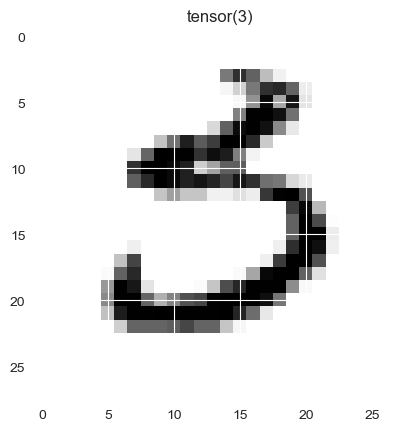

In [9]:
plt.imshow(X.view(28, 28), cmap='gray_r')
plt.title(y)

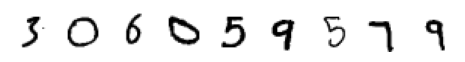

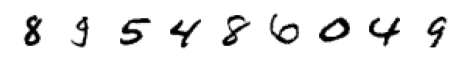

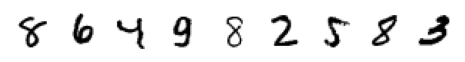

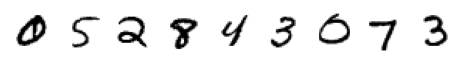

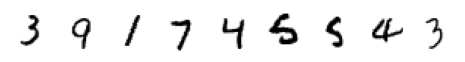

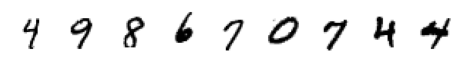

In [10]:
for _ in range(6):
    images, labels = next(iter(train_dataloader))
    figure = plt.figure()
    for index in range(1, 10):
        plt.subplot(1, 10, index)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Процентоное соотношение цифры 0 от общего кол-ва цифр: 9.871666666666666%
Процентоное соотношение цифры 1 от общего кол-ва цифр: 11.236666666666666%
Процентоное соотношение цифры 2 от общего кол-ва цифр: 9.93%
Процентоное соотношение цифры 3 от общего кол-ва цифр: 10.218333333333334%
Процентоное соотношение цифры 4 от общего кол-ва цифр: 9.736666666666666%
Процентоное соотношение цифры 5 от общего кол-ва цифр: 9.035%
Процентоное соотношение цифры 6 от общего кол-ва цифр: 9.863333333333333%
Процентоное соотношение цифры 7 от общего кол-ва цифр: 10.441666666666666%
Процентоное соотношение цифры 8 от общего кол-ва цифр: 9.751666666666667%
Процентоное соотношение цифры 9 от общего кол-ва цифр: 9.915%


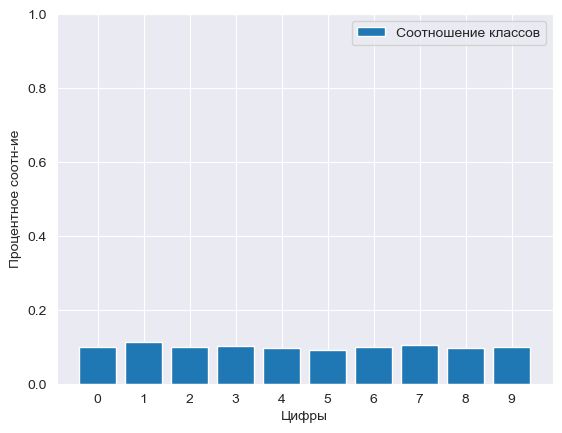

In [11]:
total = 0
dic_count = {int(i): 0 for i in range(10)}
for dat in train_dataloader:
    tens, mark = dat
    for y in mark:
        dic_count[int(y)] += 1
        total += 1
print(dic_count)
for k, v in dic_count.items():
    print(f'Процентоное соотношение цифры {k} от общего кол-ва цифр: {v*100/total}%')
keys = dic_count.keys()
vals = dic_count.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Цифры")
plt.xticks(list(keys))
plt.legend()
plt.show()

Так как набор данных предварительно обработан, то наблюдаем сбалансированность данных, следовательно прибегать к дополнительным методам не придется

In [66]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [67]:
model = NeuralNetwork().to(device)

In [68]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 128]          32,896
              ReLU-9                  [-1, 128]               0
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Архитектура ИНС имеет следующий вид: 784 входа, которые равны количеству пикселей в изображении, 3 скрытых слоя по 512, 256 и 128 нейронов соответственно. В качестве функции активации используется ReLU, которая имеет вид
![image](ReLUpic.jpg)
Всего в модели 567434 рассчитываемых параметров

In [69]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [70]:
def train_loop(dataloader, model, loss_function, optimizer):
    global cortrain
    num_batches = len(dataloader)

    train_loss, corr_train = 0, 0
    cortrain = []
    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        corr_train += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )
    cortrain = corr_train* 100
    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    global cortest
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0
    cortest = []
    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )
    cortest = correct * 100
    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [71]:
# обучение модели и построение графика обучения
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 60
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.294389
Потери на тестовых данных: 2.285451, Точность модели на тестовых данных: 14.1% 

Эпоха номер 2
Потери обучения: 2.273277
Потери на тестовых данных: 2.257169, Точность модели на тестовых данных: 34.2% 

Эпоха номер 3
Потери обучения: 2.232042
Потери на тестовых данных: 2.194546, Точность модели на тестовых данных: 45.1% 

Эпоха номер 4
Потери обучения: 2.124399
Потери на тестовых данных: 2.017188, Точность модели на тестовых данных: 49.0% 

Эпоха номер 5
Потери обучения: 1.836590
Потери на тестовых данных: 1.595332, Точность модели на тестовых данных: 62.2% 

Эпоха номер 6
Потери обучения: 1.346909
Потери на тестовых данных: 1.090428, Точность модели на тестовых данных: 74.6% 

Эпоха номер 7
Потери обучения: 0.938707
Потери на тестовых данных: 0.786663, Точность модели на тестовых данных: 79.2% 

Эпоха номер 8
Потери обучения: 0.723533
Потери на тестовых данных: 0.640414, Точность модели на тестовых данных: 81.8% 

Эпоха номер 9
Потери обучения: 0

In [75]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

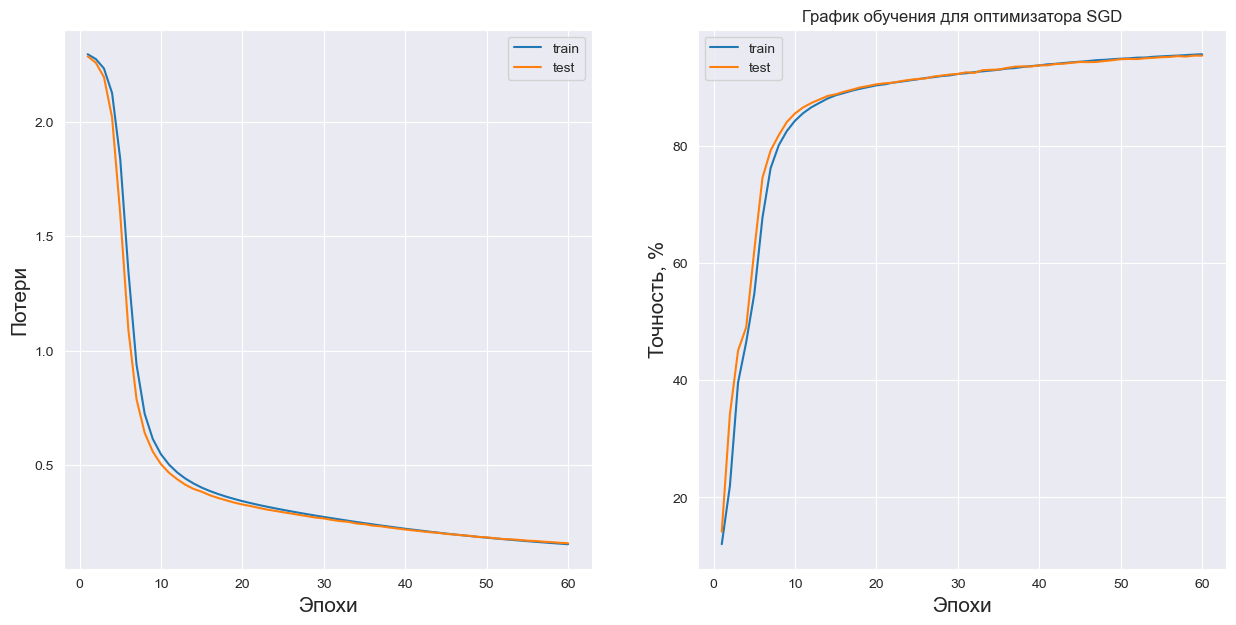

In [87]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График обучения для оптимизатора SGD")
plt.grid
plt.show()

In [98]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [99]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [100]:
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 7
learning_rate = 0.001
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.228242
Потери на тестовых данных: 0.120702, Точность модели на тестовых данных: 96.3% 

Эпоха номер 2
Потери обучения: 0.092495
Потери на тестовых данных: 0.096451, Точность модели на тестовых данных: 97.1% 

Эпоха номер 3
Потери обучения: 0.066051
Потери на тестовых данных: 0.082471, Точность модели на тестовых данных: 97.5% 

Эпоха номер 4
Потери обучения: 0.050381
Потери на тестовых данных: 0.082757, Точность модели на тестовых данных: 97.7% 

Эпоха номер 5
Потери обучения: 0.038286
Потери на тестовых данных: 0.100072, Точность модели на тестовых данных: 97.4% 

Эпоха номер 6
Потери обучения: 0.035149
Потери на тестовых данных: 0.092601, Точность модели на тестовых данных: 97.5% 

Эпоха номер 7
Потери обучения: 0.028072
Потери на тестовых данных: 0.069734, Точность модели на тестовых данных: 98.2% 

Обучение завершнео за 7 эпох, затраченное время: 42.599 секунд


In [101]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

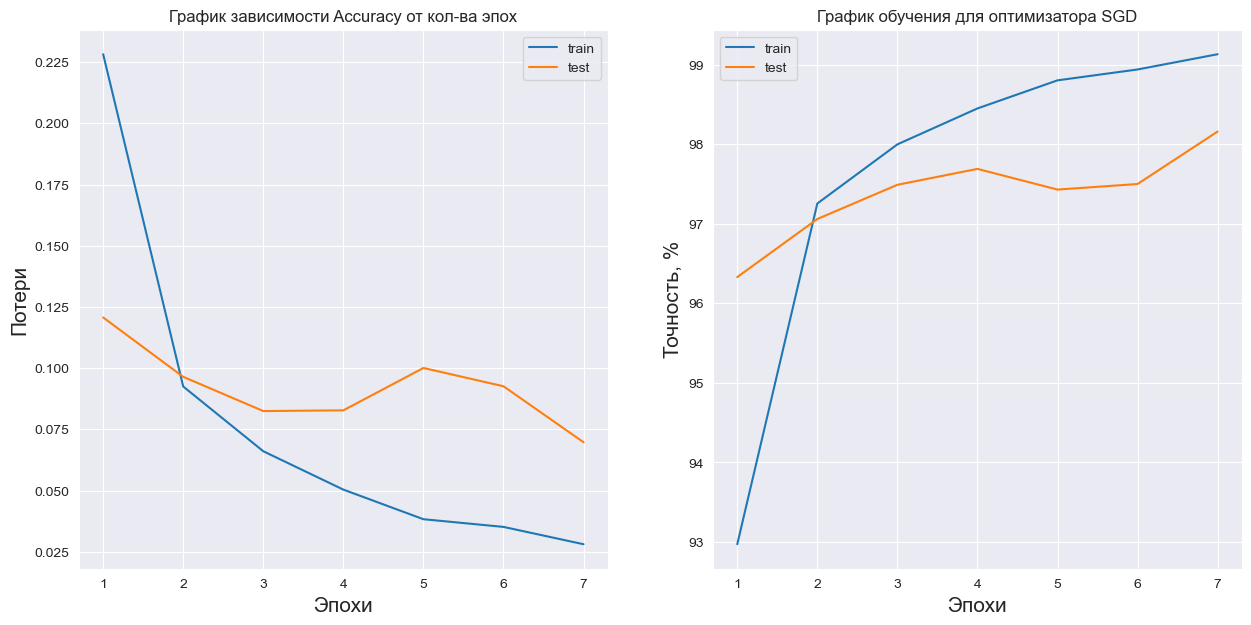

In [102]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График обучения для оптимизатора SGD")
plt.grid
plt.show()

Используя оптимизатор Adam модель обучается быстрее и требует меньших вычислительных мощностей. В обоих случаях точность модели очень высокая.

In [103]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([-16.7945,  -6.3305,  -3.6554,  -6.9587,  -2.5619, -13.9383, -30.0238,
         14.4802,  -5.5799,  -2.0096], device='cuda:0')
Предсказанный класс:  7


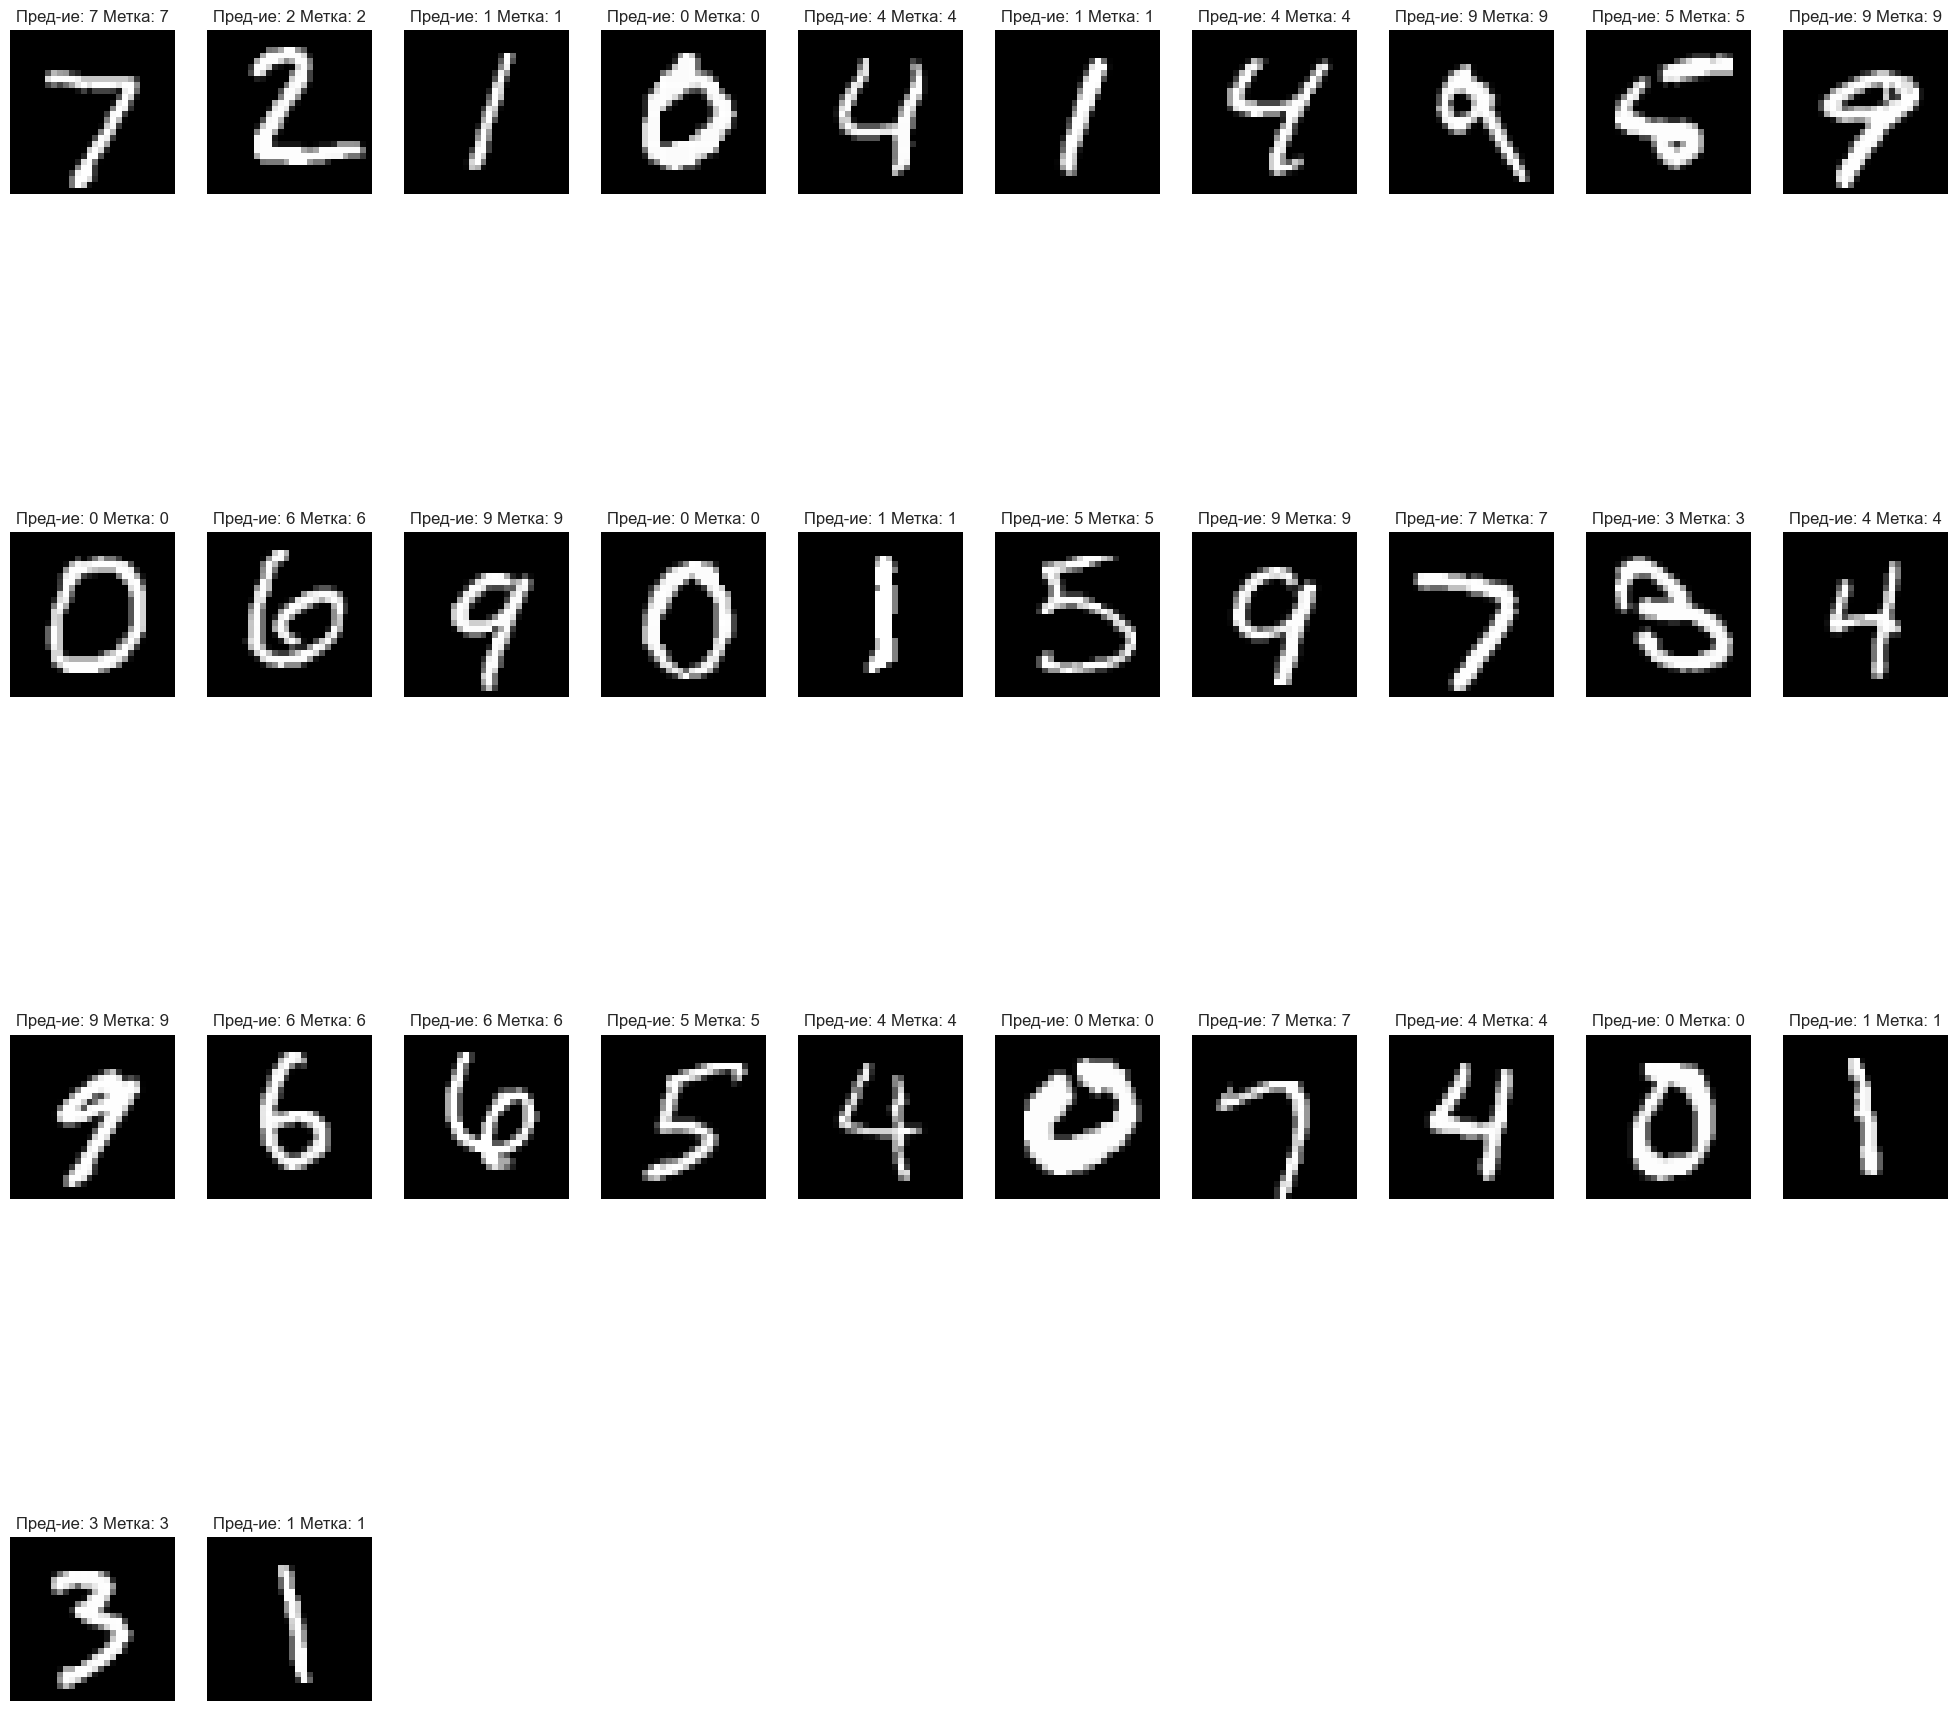

In [104]:
plt.figure(figsize=(25.0, 25.0))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [105]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X.view(-1, 784))
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 98.16%
Precision score: 98.17%
Recall score: 98.13%
f1 score: 98.15%


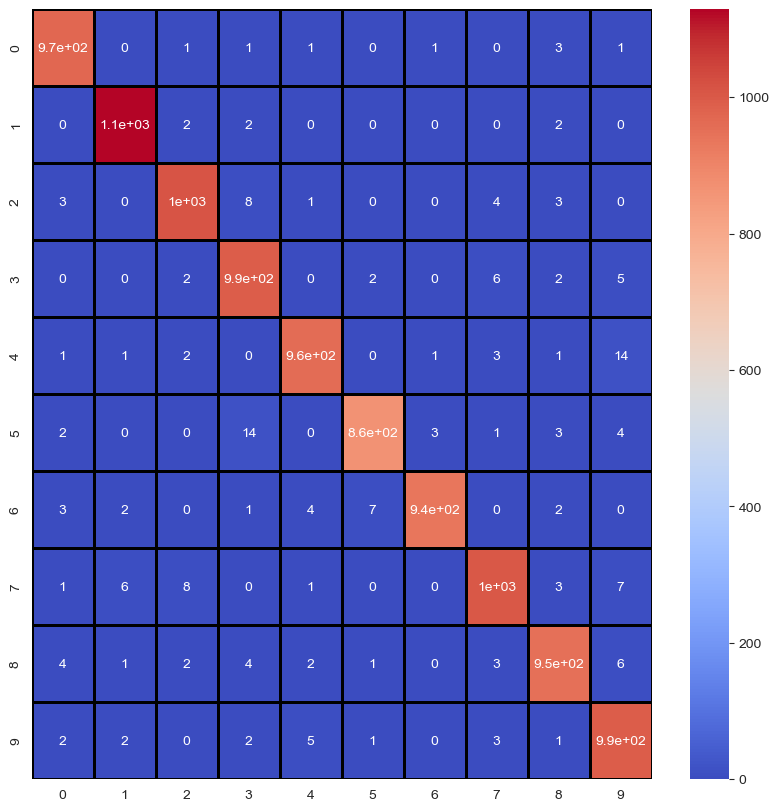

In [106]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

Наблюдаем очень хорошие показатели точности для обученной модели.

# Сверточная сеть для MNIST

In [148]:
num_epochs = 5
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [149]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # in channel=1, out=32
            nn.MaxPool2d(2),  # size [32,14,14]
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),  # in channel=32, out=32
            nn.MaxPool2d(2),  # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 100),  # in = channel*heght*width
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        x = self.conv_stack(x)
        return x

In [150]:
model = CNN_model().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [151]:
print(model)

CNN_model(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [152]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              ReLU-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           9,248
         MaxPool2d-5             [-1, 32, 7, 7]               0
              ReLU-6             [-1, 32, 7, 7]               0
           Flatten-7                 [-1, 1568]               0
            Linear-8                  [-1, 100]         156,900
              ReLU-9                  [-1, 100]               0
           Linear-10                   [-1, 10]           1,010
Total params: 167,478
Trainable params: 167,478
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 0.64
Estimated T

Общая рхитектура сверточной нейронной сети представляет собой следующую картинку
![image](CONVpic.jpg)

В качестве функции активации я взял ReLU, ядро размера 3х3
Моя сеть похожа на представленную, за некоторыми исключениями:
1) Входное изображение имеет разрешение 28 х 28
2) Затем идет слой из 32 фильтров размера 28 х 28
3) Снижение размерности фильтров до 14 х 14
4) Слой с 32 фильтрами разрешением 14 х 14
5) Снижение размерности фильтров до 7 х 7
6) Слой из 100 нейронов
7) Слой из 10 выходных нейронов

In [145]:
loss_history = {"train": [], "test": []}
start_time = time.time()
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.283107
Потери на тестовых данных: 2.253759, Точность модели на тестовых данных: 53.5% 

Эпоха номер 2
Потери обучения: 2.136315
Потери на тестовых данных: 1.842426, Точность модели на тестовых данных: 66.4% 

Эпоха номер 3
Потери обучения: 1.084378
Потери на тестовых данных: 0.597651, Точность модели на тестовых данных: 84.5% 

Эпоха номер 4
Потери обучения: 0.495953
Потери на тестовых данных: 0.411467, Точность модели на тестовых данных: 88.7% 

Эпоха номер 5
Потери обучения: 0.389694
Потери на тестовых данных: 0.347642, Точность модели на тестовых данных: 90.0% 

Эпоха номер 6
Потери обучения: 0.345936
Потери на тестовых данных: 0.318489, Точность модели на тестовых данных: 90.6% 

Эпоха номер 7
Потери обучения: 0.317425
Потери на тестовых данных: 0.295414, Точность модели на тестовых данных: 91.2% 

Эпоха номер 8
Потери обучения: 0.294611
Потери на тестовых данных: 0.270830, Точность модели на тестовых данных: 92.0% 

Эпоха номер 9
Потери обучения: 0

In [146]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

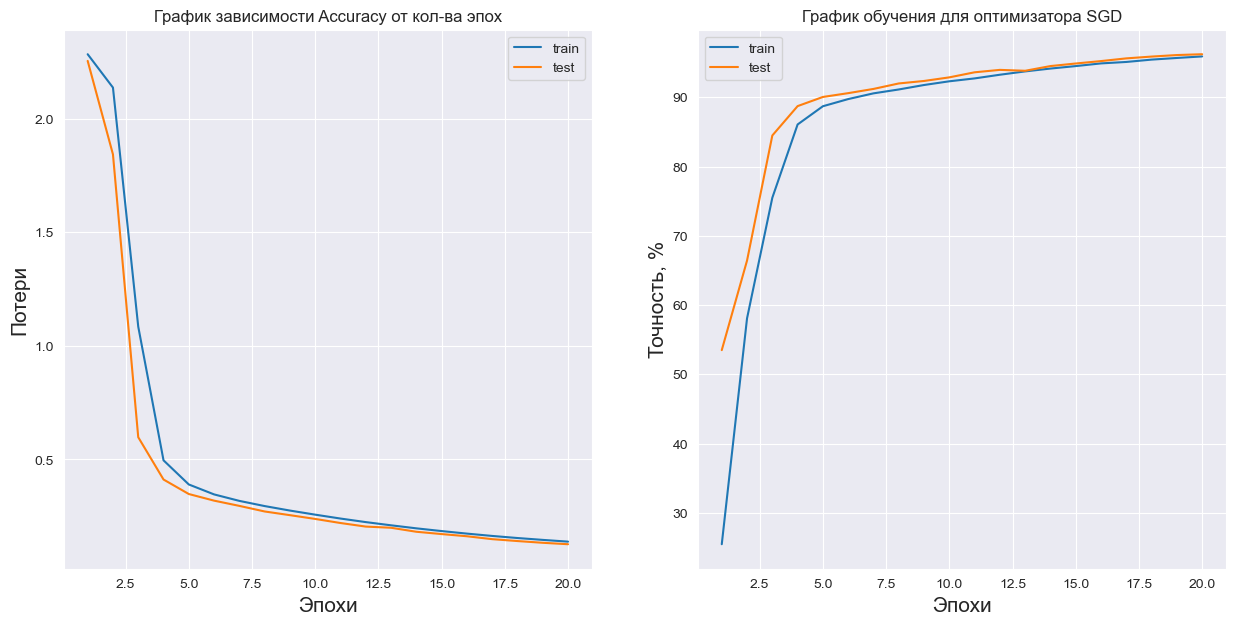

In [147]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График обучения для оптимизатора SGD")
plt.grid
plt.show()

In [153]:
loss_history = {"train": [], "test": []}
start_time = time.time()
cor_test = []
cor_train = []
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)
    cor_test.append(cortest)
    cor_train.append(cortrain)
    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.156884
Потери на тестовых данных: 0.054107, Точность модели на тестовых данных: 98.3% 

Эпоха номер 2
Потери обучения: 0.048707
Потери на тестовых данных: 0.030222, Точность модели на тестовых данных: 99.1% 

Эпоха номер 3
Потери обучения: 0.034254
Потери на тестовых данных: 0.046073, Точность модели на тестовых данных: 98.6% 

Эпоха номер 4
Потери обучения: 0.026476
Потери на тестовых данных: 0.042206, Точность модели на тестовых данных: 98.6% 

Эпоха номер 5
Потери обучения: 0.020917
Потери на тестовых данных: 0.029456, Точность модели на тестовых данных: 99.0% 

Обучение завершнео за 5 эпох, затраченное время: 34.187 секунд


In [154]:
cor_test_g = [x / 10000 for x in cor_test]
cor_train_g = [x / 60000 for x in cor_train]

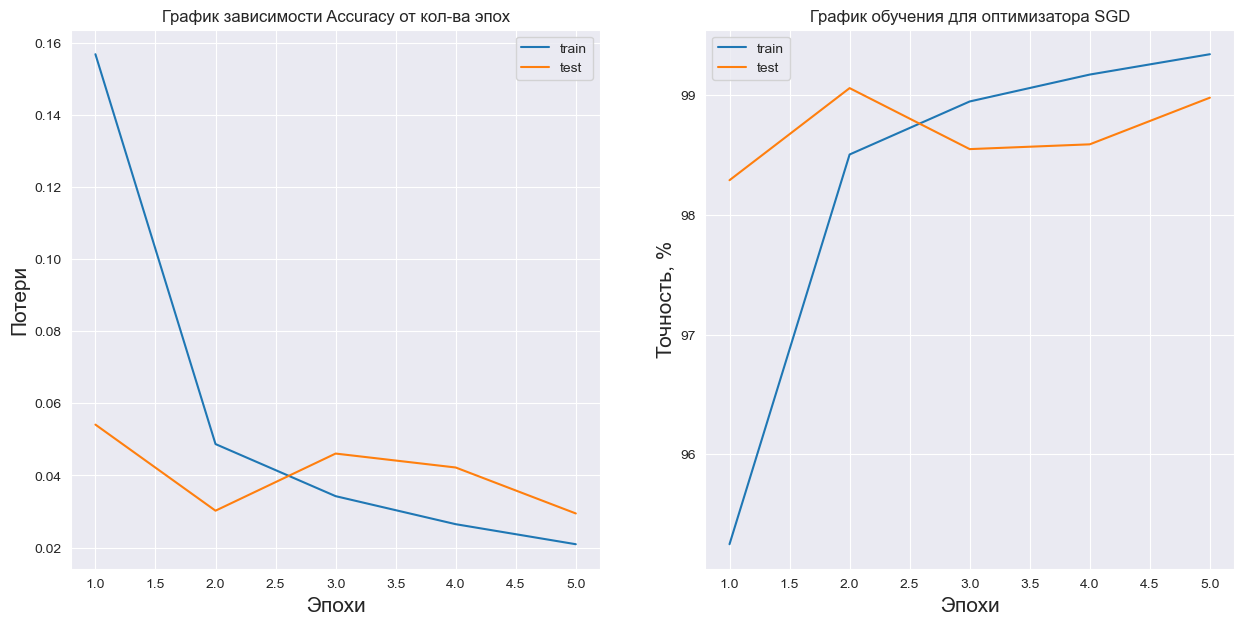

In [155]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), cor_train_g, label="train")
plt.plot(range(1, num_epochs + 1), cor_test_g, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График обучения для оптимизатора SGD")
plt.grid
plt.show()

Обе модели имеют отличную точность, но оптимизатор Adam снова показал себя точнее и сократил время обучения и ресурсы.

In [156]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([ -6.7884,  -6.4340,  -4.6407,  -0.2519,  -2.9796,  -5.1352, -14.5423,
         13.0694,  -4.1407,   2.2880], device='cuda:0')
Предсказанный класс:  7


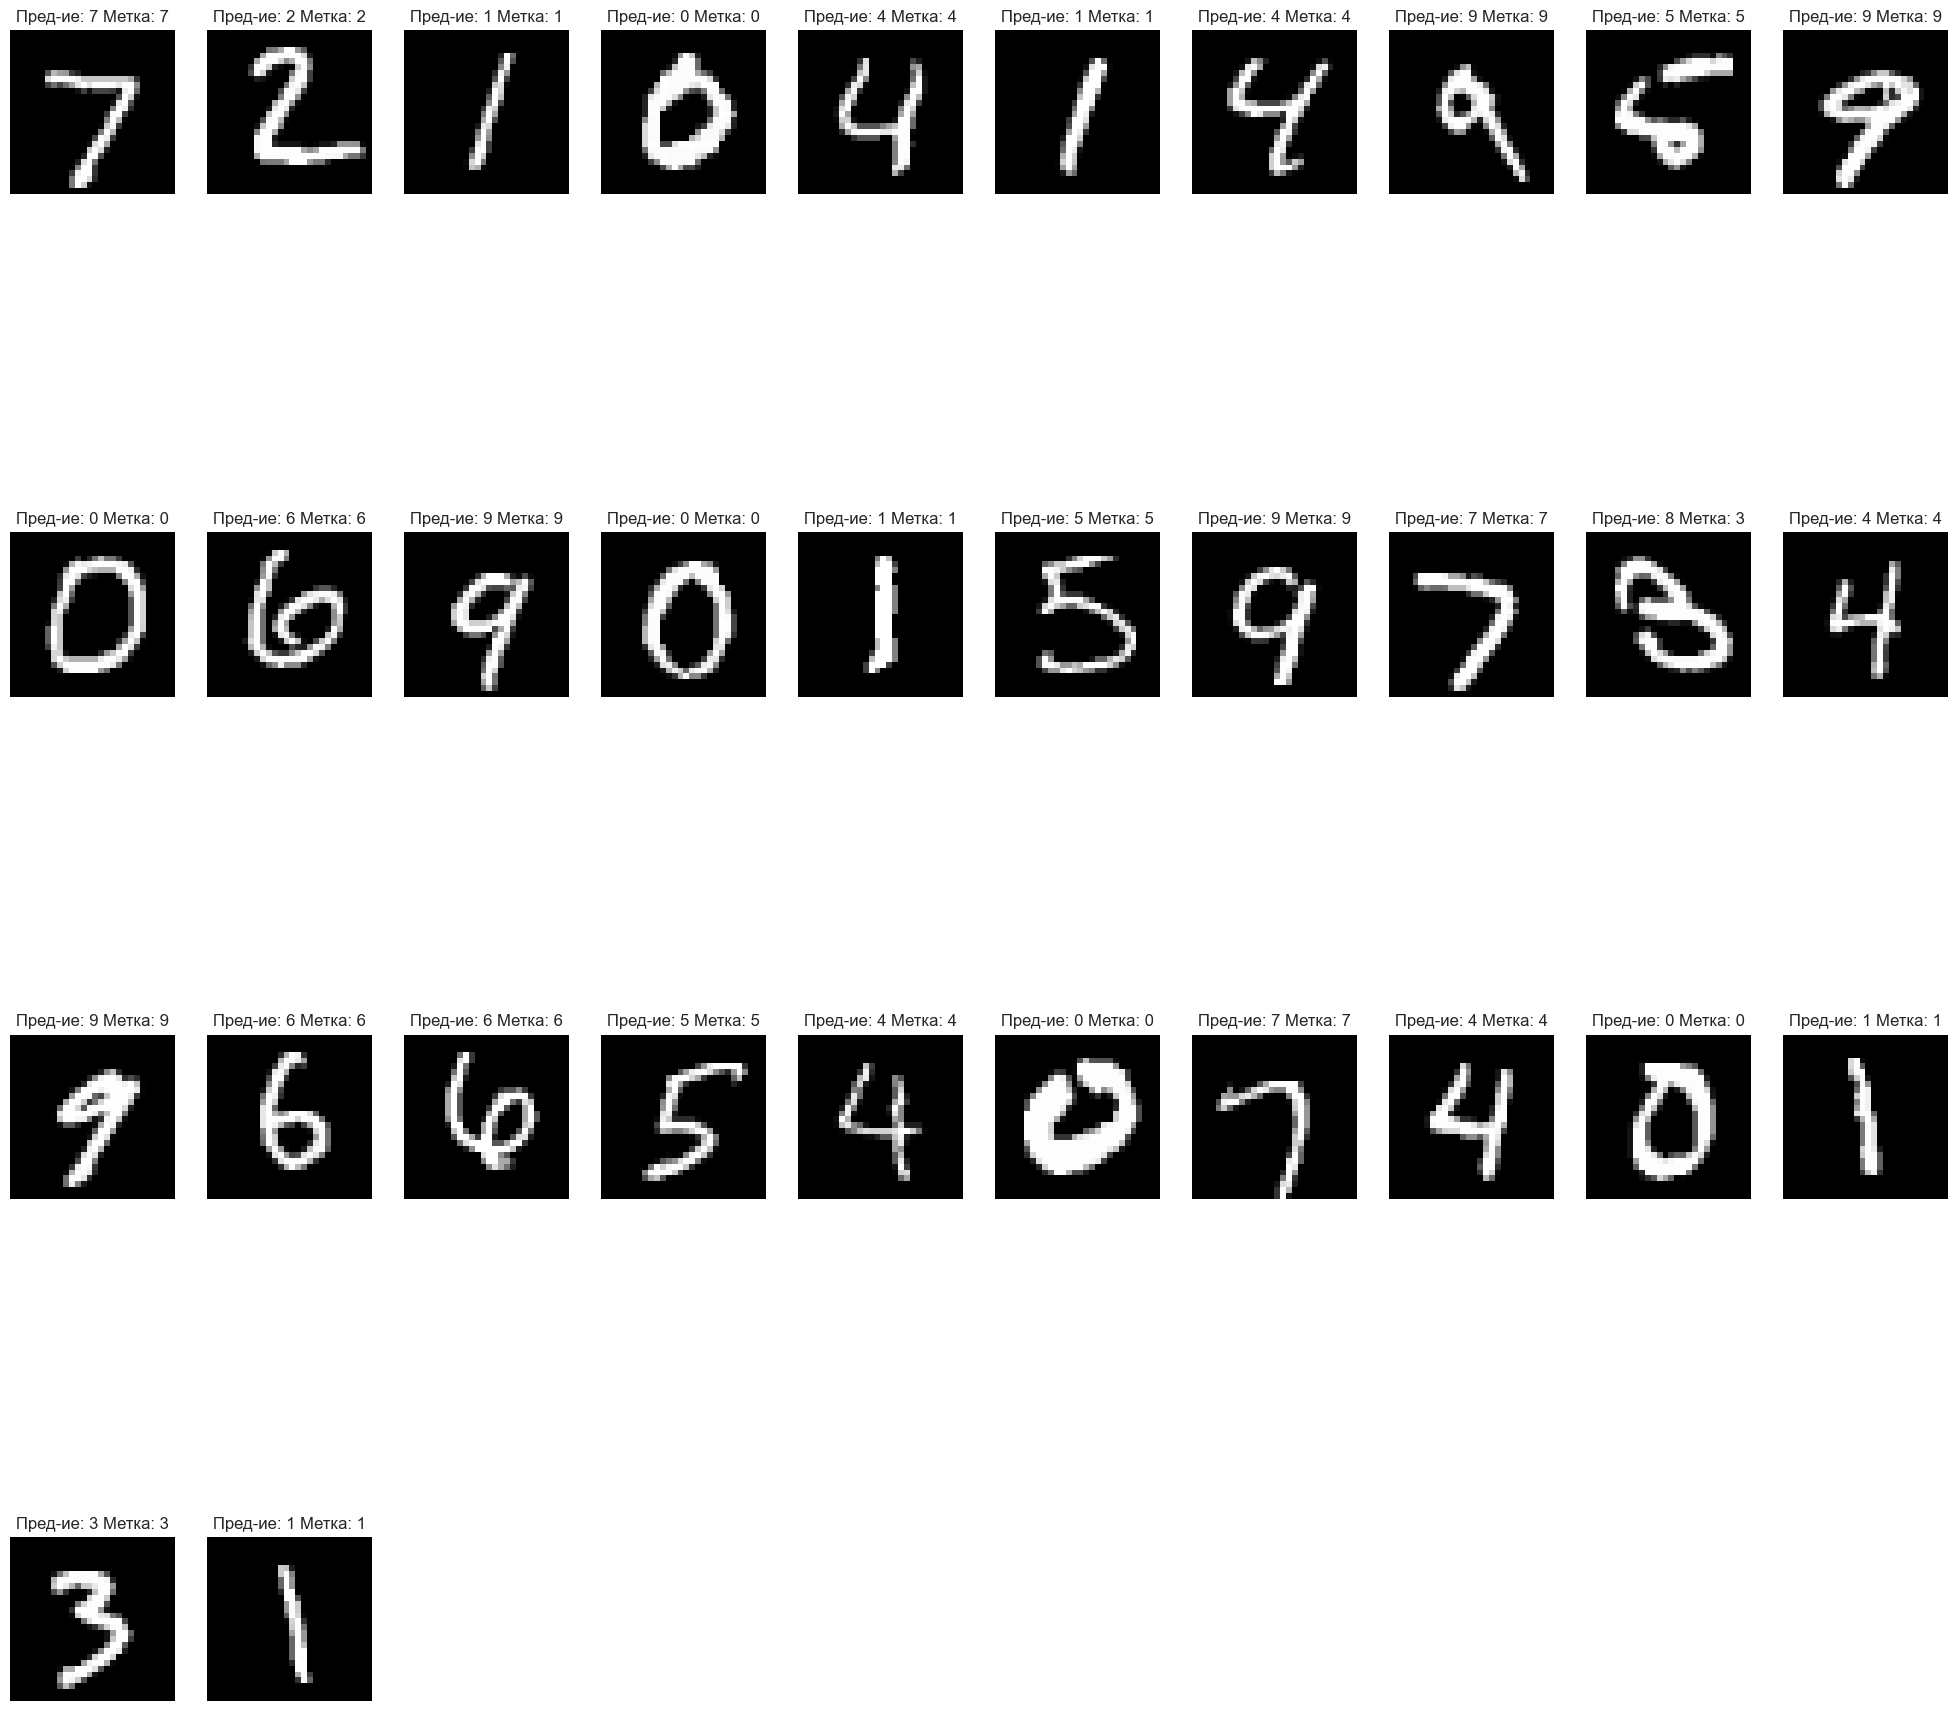

In [157]:
plt.figure(figsize=(25.0, 25.0))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [158]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X)
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 98.98%
Precision score: 98.97%
Recall score: 98.97%
f1 score: 98.97%


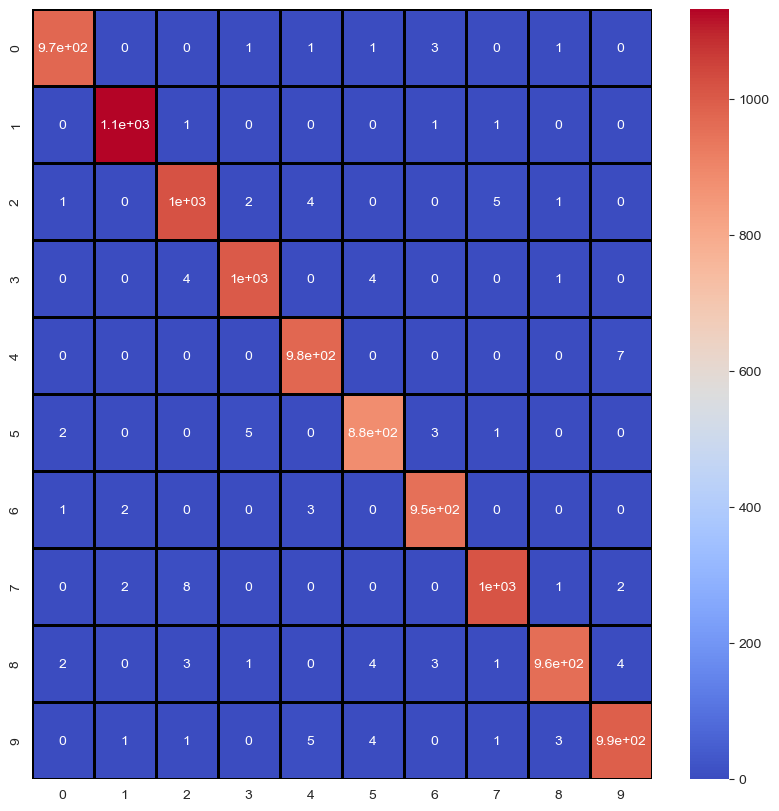

In [159]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

Матрица ошибок показывает нам сколько раз мы предсказали одну цифру как другую, например: мы предсказали 8 как 0 3 раза или 3 как 8 2 раза. По сути матрица ошибок представляют сырую форму всех показателей качества, из которой они могут быть вычислены.

In [160]:
df = pd.DataFrame({"Структура ИНС":["FCN MLP", "FCN MLP", "Conv. network", "Conv. network"], "Оптимизатор":["SGD","Adam", "SGD", "Adam"],"Train loss":["0,15","0,09","0,12","0,03"], "Accuracy":["95,36%", "98,15%","96,54%","99,05%"], "Precison":["95,31%", "98,16%","96,54%", "99,04%"], "Recall":["95,33%", "98,14%","96.51%", "99,05%"], "f1":["95,31%", "98,15%", "95,51%", "99,04%"]})

In [161]:
print(df.to_markdown(index=False))

| Структура ИНС   | Оптимизатор   | Train loss   | Accuracy   | Precison   | Recall   | f1     |
|:----------------|:--------------|:-------------|:-----------|:-----------|:---------|:-------|
| FCN MLP         | SGD           | 0,15         | 95,36%     | 95,31%     | 95,33%   | 95,31% |
| FCN MLP         | Adam          | 0,09         | 98,15%     | 98,16%     | 98,14%   | 98,15% |
| Conv. network   | SGD           | 0,12         | 96,54%     | 96,54%     | 96.51%   | 95,51% |
| Conv. network   | Adam          | 0,03         | 99,05%     | 99,04%     | 99,05%   | 99,04% |


Для более ясного понимания того, как работает сверточная ИНС, предлагаю отобразить, как выглядят нейроны в сверточной ИНС.

In [189]:
weight_tensor = model.conv_stack[0].weight.data  # extract weights

In [190]:
img_grid = utils.make_grid((weight_tensor + 1) / 2, pad_value=1)

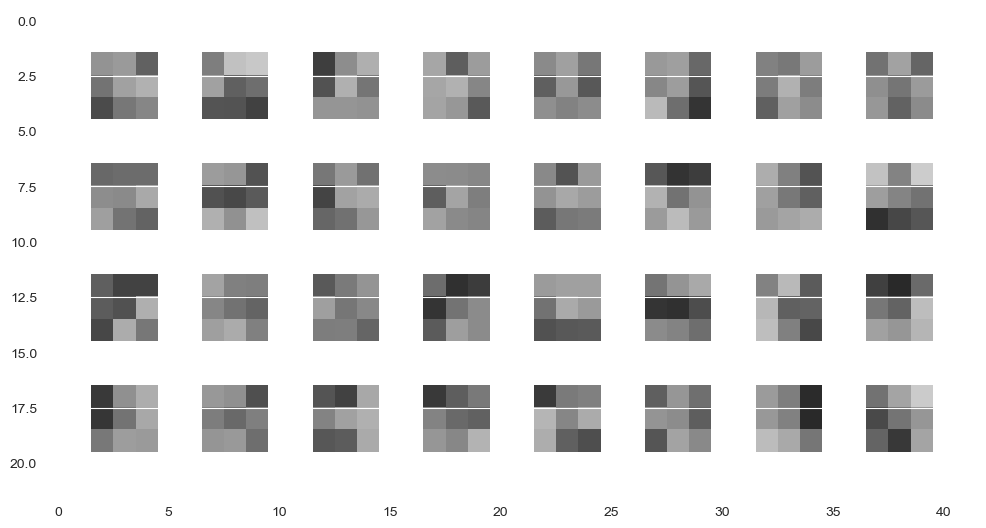

In [192]:
plt.rcParams["figure.figsize"] = (12, 12)
plt.imshow(np.transpose(img_grid, (1, 2, 0)), cmap="gray")
plt.show()

Мы видим 32 фильтра размером 3х3, грубо говоря это и есть наши нейроны. Каждый пиксель несет за собой определенное значение весового коэффициента. Фильтры поочередно накладываются на изображение, и если паттерн фильтра "совпадает" с входной картинкой, то нейрон активируется. Конечно это грубая абстракция того, как обучается сверточная нейронная сеть. Такие фильтры могут иметь разные размеры и цветовые каналы, но в общем, суть похожа на описанный выше алгоритм.